In this notebook:
- Based on the conclusions from the EDA notebook, three models were trained: **Random Forest**, **Gradient Boosting**, and **Logistic Regression**. The first two are **tree-based models**.
- Numerical columns were scaled for the **Logistic Regression** model, and categorical features were **one-hot encoded** due to their **low cardinality** (3 and 4), as identified during the EDA.
- The target column was encoded using a label encoder.
- Four metrics **precision**, **recall**, **f1_score**, and **roc_auc** along with confusion matrices, were used to evaluate model performance.
- Evaluation was conducted on both the **training** and **testing** sets to check for possible **overfitting**.

In [4]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

### **Importing libraries**

In [5]:
from src.train import train_model
from src.evaluate import evaluate_model, evaluate_train_data
from src.utils import load_data
import pandas as pd

### **Training and evaluating baseline models**

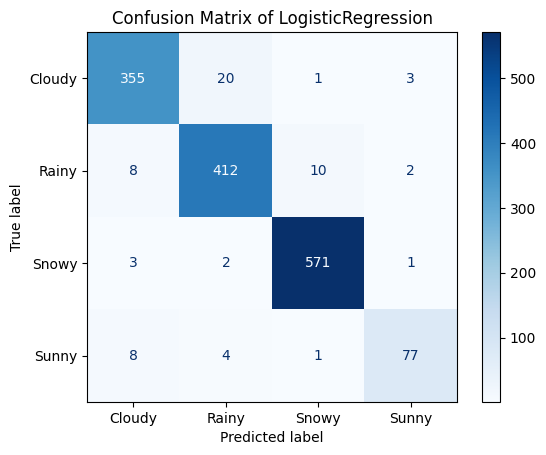

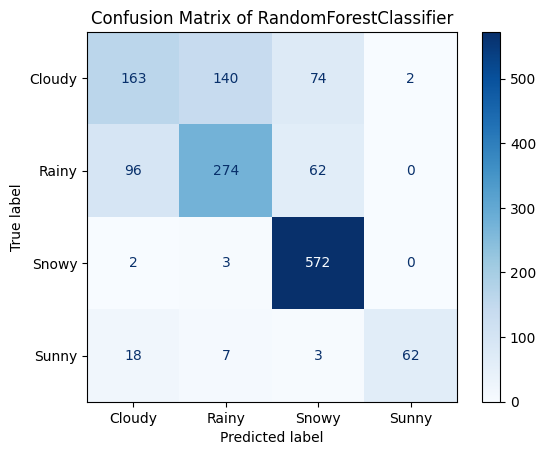

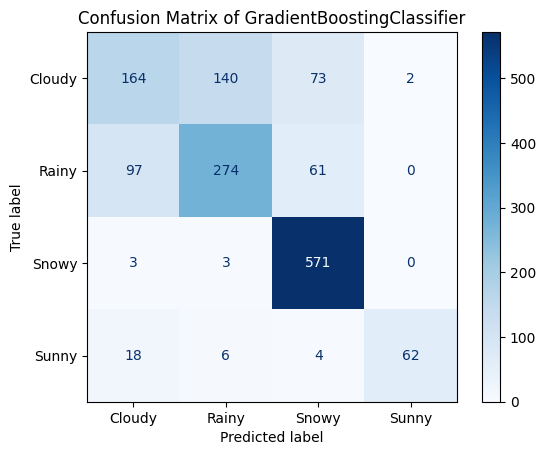

In [ ]:
train_data = load_data('../data/02_clean/cleaned_train_data.csv')
test_data = load_data('../data/02_clean/cleaned_test_data.csv')


models = train_model(train_data)

results_rows = []

for model_name, model in models.items():

    train_scores = evaluate_train_data(model, train_data)
    
    # Just taking the first element (metrics), because the second is the confusion matrix
    test_scores = evaluate_model(model, test_data)[0]

    results_rows.append({
        "model": model_name,
        "split": "train",
        **train_scores
    })

    results_rows.append({
        "model": model_name,
        "split": "test",
        **test_scores
    })

    results = pd.DataFrame(results_rows)

In [ ]:
results

,model,split,precision,recall,f1_score,roc_auc
0,log_reg,train,0.955021,0.955168,0.954912,0.986125
1,log_reg,test,0.957185,0.957375,0.957157,0.989259
2,rand_forest,train,0.702191,0.713416,0.698869,0.864885
3,rand_forest,test,0.711757,0.724628,0.709940,0.864398
4,grad_boost,train,0.702152,0.713246,0.698991,0.864514
5,grad_boost,test,0.711855,0.724628,0.710290,0.864671


From the confusion matrix and the four evaluated metrics, the **Logistic Regression** model clearly outperformed both tree-based models, **Random Forest** and **Gradient Boosting**. Evaluating the model on both the training and testing sets shows that the metrics are almost identical, suggesting that there is no overfitting. The superior performance of logistic regression may be due to a strong linear relationship between some of the features and the target, which allowed it to capture the underlying patterns more effectively than the tree-based models.

### **Saving baseline model results**

In [ ]:
results.to_csv('../results/01_baseline_models/baseline_model_performance.csv', index=False)